## Movie Review Sentiment Analyisis

In [15]:
import pandas as pd 
import numpy as np 
import re 

In [16]:
%pwd

'c:\\nlpProject'

In [17]:
# open the recently created rotten tomatoes dataset for analysis
df = pd.read_csv('Rotten_Tomatoes_Dataset.csv')
df.head()

,Unnamed: 0,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,threshold,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,sentiment
0,23,m/0814255,Kurt Loder,False,MTV,Rotten,1,2/12/2010,Sadly worthy of its dumping into the cinematic...,5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
1,44,m/0814255,Christopher Tookey,False,Daily Mail (UK),Rotten,1,2/16/2010,"Maybe if you're aged between eight and 12, or ...",5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
2,50,m/0814255,Tim Robey,True,Daily Telegraph (UK),Rotten,1,2/16/2010,A slab of market research in search of an actu...,5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
3,58,m/0814255,Anthony Quinn,True,Independent (UK),Rotten,1,2/16/2010,If they'd played it for laughs it might just h...,5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative
4,61,m/0814255,Derek Malcolm,True,London Evening Standard,Rotten,1,2/16/2010,This ineffably wooden Chris Columbus adaptatio...,5,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Negative


In [18]:
df.columns

Index(['Unnamed: 0', 'rotten_tomatoes_link', 'critic_name', 'top_critic',
       'publisher_name', 'review_type', 'review_score', 'review_date',
       'review_content', 'threshold', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'sentiment'],
      dtype='object')

In [19]:
df.describe()

,Unnamed: 0,review_score,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,59037.000000,59037.000000,58674.000000,58969.000000,58969.000000,58926.000000,5.891000e+04,59037.000000,59037.000000,59037.000000
mean,212619.218643,3.737063,110.886594,68.910156,157.596771,68.852238,5.334537e+05,33.383709,118.964886,38.575791
std,125983.044495,1.859246,22.145725,31.308442,113.896312,21.240769,3.607354e+06,17.996908,111.227056,43.367737
min,23.000000,1.000000,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,102126.000000,1.000000,95.000000,43.000000,64.000000,53.000000,7.652000e+03,17.000000,29.000000,7.000000
50%,214224.000000,5.000000,107.000000,85.000000,135.000000,76.000000,3.641800e+04,36.000000,81.000000,22.000000
75%,321294.000000,5.000000,122.000000,93.000000,226.000000,86.000000,1.415010e+05,48.000000,183.000000,55.000000
max,431552.000000,5.000000,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [20]:
df = df[['movie_title','genres','review_content','sentiment']] # select only the columns we want to work with 

In [21]:
df.head()

,movie_title,genres,review_content,sentiment
0,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Sadly worthy of its dumping into the cinematic...,Negative
1,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...","Maybe if you're aged between eight and 12, or ...",Negative
2,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",A slab of market research in search of an actu...,Negative
3,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",If they'd played it for laughs it might just h...,Negative
4,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",This ineffably wooden Chris Columbus adaptatio...,Negative


## Data Preperation

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [23]:
# clean the review column 
def clean_text(text):
    """ 
    Change words to lower case, remove any punctuation and stop words 
    """
    text = text.lower()
    text = re.sub('[!|.|,|?|!|-|+]','',text)
    text = re.sub('\d','',text)
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text 

In [24]:
clean_text('Hello 123?')

'hello'

In [25]:
cleaned = lambda x: clean_text(x)

In [26]:
df['review_content'] = df['review_content'].apply(cleaned)

KeyboardInterrupt: 

In [27]:
df.head()

,movie_title,genres,review_content,sentiment
0,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Sadly worthy of its dumping into the cinematic...,Negative
1,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...","Maybe if you're aged between eight and 12, or ...",Negative
2,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",A slab of market research in search of an actu...,Negative
3,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",If they'd played it for laughs it might just h...,Negative
4,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",This ineffably wooden Chris Columbus adaptatio...,Negative


## Model Building: Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
#from sklearn.feature_extraction.text import TfidfVectorizer
#seperate from reviews and response

X = df['review_content']
y = df['sentiment']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
print(X_train.shape)
print(y_train.shape)

(47229,)
(47229,)


In [30]:
print(X_test.shape)
print(y_test.shape)

(11808,)
(11808,)


In [31]:
# train the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
tvec = TfidfVectorizer()
clf = LogisticRegression()

In [32]:
model = Pipeline([('vectorizer',tvec),('classifier',clf)])
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [33]:
pred = model.predict(X_test)
pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [34]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
# We get an accuracy score of 87 %

0.8860941734417345
[[2777 1003]
 [ 342 7686]]


In [35]:
#perform crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)

C:\Users\jubuckner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jubuckner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

In [36]:
print(np.mean(scores)) # After performing a 10 k-fold cross validation we get an overall average score of 87% making it a consistent classifier

0.874874891367074


In [37]:
#Try out a few random movie reviews to see how the model runs 
a = 'This is the best movie','This is a terrible move'
model.predict(list(a))

array(['Positive', 'Negative'], dtype=object)

40397
18640
8862
6116
5659
5585
3220
196
11975
3339
841
1695
4196
2018


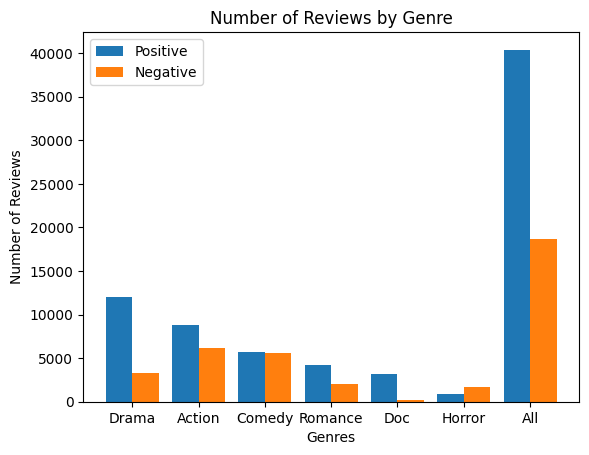

In [38]:
#Graphing Sentiment by Genre
# 1. get list of movies by genre
# 2. loop thru genre list to compute the quantity of positive and the quantity of the negative sentiment
# 3. create list object containing quantity of positive and negative sentiment for each genre: i.e. obj = { action: { positive: 100, negative: 50 }, drama: { positive: 75, action: 30}, comedity: {...}}
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Rotten_Tomatoes_Dataset.csv')
# df = df[['movie_title','genres','review_content','sentiment']]
actionFilter = df.genres == 'Action'
# actionMoviesCOUNT = df['genres'].str.contains('Action').sum()

# positiveActionMovies = df[(df.genres.str.contains('Action').any()) & (df.sentiment.eq)]
# print (positiveActionMovies)
# positive = (df.sentiment.eq('Positive')).sum()
# print (positive)

# NOTE: to filter genres, will be using startswith. This is for two reasons: 1) Assumption for this method is that the leading genre is the main/primary genre 2) avoid overlap in our data among genres
# Positive Action Movies. EXCEPT for 'Classic' movies, code looks for the word 'Classic' inside the genres column
genreList = ['Drama', 'Action', 'Comedy', 'Romance', 'Doc', 'Horror', 'All']
positiveAll = df[(df.sentiment.eq('Positive'))]
positiveAllCOUNT = len(positiveAll.index)
print(positiveAllCOUNT)
# Negative Action Movies
negativeAll = df[(df.sentiment.eq('Negative'))]
negativeAllCOUNT = len(negativeAll.index)
print(negativeAllCOUNT)

positiveAction = df[(df.genres.str.startswith('Action')) & (df.sentiment.eq('Positive'))]
positiveActionCOUNT = len(positiveAction.index)
print(positiveActionCOUNT)
# Negative Action Movies
negativeAction = df[(df.genres.str.startswith('Action')) & (df.sentiment.eq('Negative'))]
negativeActionCOUNT = len(negativeAction.index)
print(negativeActionCOUNT)

# Positive Comedy Movies
positiveComedy = df[(df.genres.str.startswith('Comedy')) & (df.sentiment.eq('Positive'))]
positiveComedyCOUNT = len(positiveComedy.index)
print(positiveComedyCOUNT)

# Negative Comedy Movies
negativeComedy = df[(df.genres.str.startswith('Comedy')) & (df.sentiment.eq('Negative'))]
negativeComedyCOUNT = len(negativeComedy.index)
print(negativeComedyCOUNT)


# Positive Documentary Movies
positiveDocumentary = df[(df.genres.str.startswith('Documentary')) & (df.sentiment.eq('Positive'))]
positiveDocumentaryCOUNT = len(positiveDocumentary.index)
print(positiveDocumentaryCOUNT)

# Negative Documentary Movies
negativeDocumentary = df[(df.genres.str.startswith('Documentary')) & (df.sentiment.eq('Negative'))]
negativeDocumentaryCOUNT = len(negativeDocumentary.index)
print(negativeDocumentaryCOUNT)

# Positive Drama Movies
positiveDrama = df[(df.genres.str.startswith('Drama')) & (df.sentiment.eq('Positive'))]
positiveDramaCOUNT = len(positiveDrama.index)
print(positiveDramaCOUNT)

# Negative Drama Movies
negativeDrama = df[(df.genres.str.startswith('Drama')) & (df.sentiment.eq('Negative'))]
negativeDramaCOUNT = len(negativeDrama.index)
print(negativeDramaCOUNT)

# Positive Horror Movies
positiveHorror = df[(df.genres.str.startswith('Horror')) & (df.sentiment.eq('Positive'))]
positiveHorrorCOUNT = len(positiveHorror.index)
print(positiveHorrorCOUNT)

# Negative Horror Movies
negativeHorror = df[(df.genres.str.startswith('Horror')) & (df.sentiment.eq('Negative'))]
negativeHorrorCOUNT = len(negativeHorror.index)
print(negativeHorrorCOUNT)


# Positive Romance Movies
positiveRomance = df[(df.genres.str.contains('Romance')) & (df.sentiment.eq('Positive'))]
positiveRomanceCOUNT = len(positiveRomance.index)
print(positiveRomanceCOUNT)

# Negative Romance Movies
negativeRomance = df[(df.genres.str.contains('Romance')) & (df.sentiment.eq('Negative'))]
negativeRomanceCOUNT = len(negativeRomance.index)
print(negativeRomanceCOUNT)

# # Positive Classic Movies
# positiveClassic = df[(df.genres.str.contains('Classic')) & (df.sentiment.eq('Positive'))]
# positiveClassicCOUNT = len(positiveClassic.index)
# print(positiveClassicCOUNT)

# # Negative Classic Movies
# negativeClassic = df[(df.genres.str.contains('Classic')) & (df.sentiment.eq('Negative'))]
# negativeClassicCOUNT = len(negativeClassic.index)
# print(negativeClassicCOUNT)

positiveCounts = [positiveDramaCOUNT, positiveActionCOUNT, positiveComedyCOUNT, positiveRomanceCOUNT, positiveDocumentaryCOUNT, positiveHorrorCOUNT, positiveAllCOUNT ]
negativeCounts = [negativeDramaCOUNT, negativeActionCOUNT, negativeComedyCOUNT,  negativeRomanceCOUNT, negativeDocumentaryCOUNT, negativeHorrorCOUNT, negativeAllCOUNT ]

X_axis = np.arange(len(genreList))
# print(X_axis)

plt.bar(X_axis - 0.2, positiveCounts, 0.4, label = 'Positive')
plt.bar(X_axis + 0.2, negativeCounts, 0.4, label = 'Negative')

plt.xticks(X_axis, genreList)
plt.xlabel("Genres")
plt.ylabel('Number of Reviews')
plt.title("Number of Reviews by Genre")
plt.legend()
plt.show()





In [39]:
import nltk
import numpy as np
import random
import string
import re
df = pd.read_csv('Rotten_Tomatoes_Dataset.csv')


# extract all positive reviews
# df.head()
positiveReviews = df[df.sentiment.eq('Positive')]
positiveReviewContent = positiveReviews['review_content']
# positiveReviews.head()
# positiveReviewContent.head()
# print (positiveReviewContent)
positiveWordFreq = {}
# positiveText = ' '.join(positiveReviewContent)
# sub = positiveReviewContent[0:20]
# subList
# for item in positiveReviewContent:
wordList = []
for item in positiveReviewContent:
    wordList.append(nltk.word_tokenize(item))
    
flatList = [item for sublist in wordList for item in sublist]
# print(flatList)
# positive_string = ' '.join(flatList)
# positive_word_fd = nltk.FreqDist(flatList)


# Normalize text with alpha words and lowercase
# for word in flatList:
#     if word.isaplha():

norm_word_list = [word.lower() for word in flatList if word.isalpha()]
# norm_word_list

# positive_string = ' '.join(norm_word_list)
positive_word_fd = nltk.FreqDist(norm_word_list)
# positive_word_fd

non_list = ['the', 'a', 'of', 'and', 'is', 'to', 'it', 'in', 'that', 'film', 'with', 'this', 'as', 'for', 'an', 'you', 'but', 'its', 'an', 'be', 'movie', 'from', 'at', 'has', 'by', 'on', 'about', 'i', 'are', 'there', 'we', 'have', 'what', 'into', 'can', 'there', 'or', 'if', 'he', 'year', 'just', 'who', 'will', 'something']

for key in positive_word_fd:
    if non_list.count(key):
        del positive_word_fd[key]


# sorted_words = positive_word_fd(sorted(dict.items()))
# positive_word_fd
# tokens = nltk.sent_tokenize(positiveText)
# tokens
# print (positiveText)
# corpus = nltk.sent_tokenize(positiveReviewContent)
# print (corpus)
# positiveWord_fd = nltk.FreqDist(positiveReviewContent)
# # print(positiveWord_fd)
# positiveWord_fd

In [40]:
import heapq
most_freq = heapq.nlargest(100, positive_word_fd, key=positive_word_fd.get)
most_freq

['one',
 'best',
 'most',
 'all',
 'his',
 'not',
 'more',
 'story',
 'so',
 'like',
 'films',
 'than',
 'great',
 'time',
 'ever',
 'love',
 'made',
 'life',
 'up',
 'out',
 'movies',
 'do',
 'even',
 'was',
 'how',
 'no',
 'us',
 'their',
 'work',
 'way',
 'drama',
 'director',
 'never',
 'classic',
 'comedy',
 'does',
 'funny',
 'your',
 'which',
 'performance',
 'much',
 'see',
 'every',
 'world',
 'also',
 'cinema',
 'good',
 'very',
 'only',
 'make',
 'they',
 'new',
 'makes',
 'first',
 'some',
 'both',
 'been',
 'may',
 'masterpiece',
 'when',
 'full',
 'characters',
 'while',
 'could',
 'her',
 'performances',
 'seen',
 'any',
 'still',
 'action',
 'our',
 'years',
 'documentary',
 'yet',
 'well',
 'de',
 'american',
 'through',
 'own',
 'man',
 'tale',
 'horror',
 'those',
 'heart',
 'real',
 'people',
 'beautiful',
 'many',
 'human',
 'two',
 'them',
 'thriller',
 'such',
 'get',
 'experience',
 'brilliant',
 'should',
 'fun',
 'emotional',
 'better']

C:\Users\jubuckner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'AxesSubplot' object has no attribute 'show'

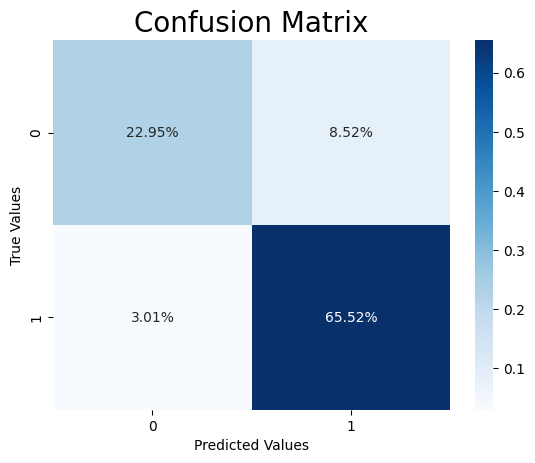

In [41]:
# heatmap of confusion matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
X = df['review_content']
y = df['sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
tvec = TfidfVectorizer()
clf = LogisticRegression()
model = Pipeline([('vectorizer',tvec),('classifier',clf)])
model.fit(X_train,y_train)
pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test,pred)

c_m_heatmap = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
c_m_heatmap.show()